In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import statistics
from astroquery.gaia import Gaia
import pickle

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'


In [2]:
# query = """SELECT 
# TOP 5000000
# source_id, ra, dec, radial_velocity, parallax, bp_rp, phot_g_mean_mag+5*log10(parallax)-10 AS mg
# FROM gaiadr2.gaia_source
# WHERE parallax_over_error > 10
# AND phot_g_mean_flux_over_error>50
# AND phot_rp_mean_flux_over_error>20
# AND phot_bp_mean_flux_over_error>20
# AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
# AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
# AND visibility_periods_used>8
# AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
# AND 1000/parallax <=200
# """

query =  """SELECT 
TOP 500000
source_id, ra, dec, radial_velocity, parallax, bp_rp, phot_g_mean_mag+5*log10(parallax)-10 AS mg
FROM gaiadr2.gaia_source
where parallax_over_error > 10
and visibility_periods_used > 8
and phot_g_mean_flux_over_error > 50
and phot_bp_mean_flux_over_error > 20
and phot_rp_mean_flux_over_error > 20
and phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
and phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
and 1000/parallax <= 200
"""

job = Gaia.launch_job_async(query) #_async
r = job.get_results()
print(type(r))
df = r.to_pandas()
df.to_csv(f'{global_path}/gaiaplot7.csv', index=False)

KeyboardInterrupt: 

In [2]:
# Load the pickle files and read the properties CSV
with open(f'{global_path}/Full/flares-PCA3D.pkl', "rb") as f:
    pca_flares = pickle.load(f)

with open(f'{global_path}/Full/dips-PCA3D.pkl', "rb") as f:
    pca_dips = pickle.load(f)

with open(f'{global_path}/Full/flares-XAE3D.pkl', "rb") as f:
    xae_flares = pickle.load(f)

with open(f'{global_path}/Full/dips-XAE3D.pkl', "rb") as f:
    xae_dips = pickle.load(f)

df_properties_global = pd.read_csv(f'{global_path}/Full/properties-Full.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)
df_flares = df_properties_global[df_properties_global['obsreg_id'].isin(pca_flares + xae_flares)]
df_dips = df_properties_global[df_properties_global['obsreg_id'].isin(pca_dips + xae_dips)]

df_flares.to_csv(f'{global_path}/Full/flare-properties-Full.csv',index=False)

print(len(df_flares))
print(len(df_dips))

4697
4259


In [15]:
print(flares_df.columns)
print(sdss_df.columns)


Index(['name', 'ra', 'dec', 'err_ellipse_r0', 'err_ellipse_r1',
       'err_ellipse_ang', 'significance', 'likelihood_class', 'conf_flag',
       'sat_src_flag', 'streak_src_flag', 'flux_aper_b', 'flux_aper_lolim_b',
       'flux_aper_hilim_b', 'flux_aper_w', 'flux_aper_lolim_w',
       'flux_aper_hilim_w', 'flux_aper_avg_b', 'flux_aper_avg_lolim_b',
       'flux_aper_avg_hilim_b', 'flux_aper_avg_w', 'flux_aper_avg_lolim_w',
       'flux_aper_avg_hilim_w', 'obsid', 'obi', 'gti_obs', 'gti_end',
       'region_id', 'theta', 'phi', 'flux_significance_b',
       'flux_significance_w', 'likelihood_b', 'likelihood_w', 'conf_code',
       'extent_code', 'sat_src_flag.1', 'streak_src_flag.1', 'var_code',
       'major_axis_b', 'minor_axis_b', 'pos_angle_b', 'major_axis_w',
       'minor_axis_w', 'pos_angle_w', 'cnts_aper_b', 'cnts_aperbkg_b',
       'cnts_aper_w', 'src_cnts_aper_b', 'src_cnts_aper_w', 'src_rate_aper_b',
       'src_rate_aper_w', 'flux_aper_b.1', 'flux_aper_lolim_b.1',
       '

In [3]:
flares_df = pd.read_csv(f'{global_path}/Full/flare-properties-Full.csv')
sdss_df = pd.read_csv(f'{global_path}/Full/CSC2-SDSSDR15_FinalXmatch.csv')
cross_df = pd.merge(flares_df, sdss_df, left_on='name', right_on='CSC2_ID', how= 'inner')

In [4]:
flares_df = pd.read_csv(f'{global_path}/Full/flare-properties-Full.csv')
sdss_df = pd.read_csv(f'{global_path}/Full/CSC2-SDSSDR15_FinalXmatch.csv')
cross_df = pd.merge(flares_df, sdss_df, left_on='name', right_on='CSC2_ID', how= 'inner')
print(len(cross_df))
pd.set_option('display.max_columns', None)
star_df = cross_df[cross_df['SDSSDR15_Type']=='S']
star_df = star_df.reset_index(drop=True)
galaxy_df = cross_df[cross_df['SDSSDR15_Type']=='G']
galaxy_df = galaxy_df.reset_index(drop=True)
print(len(star_df))
print(len(galaxy_df))

201
142
59


In [77]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list = star_df.ra.values
dec_list = star_df.dec.values

bp_rp_list = []
mg_list = []
d_list = []
index_list = []

counter_total = len(star_df)
count = 0
match = 0
reject = 0

# Loop over each coordinate
for idx, (ra, dec) in enumerate(zip(ra_list, dec_list)):
    # Convert RA and Dec to astropy.coordinates.SkyCoord
    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

    # Query Gaia
    job = Gaia.launch_job_async(f"SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS', gaiadr2.gaia_source.ra, gaiadr2.gaia_source.dec), CIRCLE('ICRS', {ra}, {dec}, 0.01))=1;")
    result = job.get_results()

    # Apply filters to select stellar sources
    stars = result
    stars_df = stars.to_pandas().reset_index(drop=True)

    if len(stars) > 0:
        # Retrieve the closest matched star
        star_coords = SkyCoord(stars['ra'], stars['dec'], frame='icrs')
        distances = coord.separation(star_coords)
        closest_star_index = distances.argmin()
        closest_star = stars_df.iloc[closest_star_index]
        closest_star_coords = SkyCoord(closest_star['ra'], closest_star['dec'], frame='icrs',unit=u.deg)
        matched_stars = Gaia.cone_search_async(closest_star_coords, radius=0.01*u.deg).get_results()
        bp_rp = matched_stars['bp_rp']
        mg = matched_stars['phot_g_mean_mag'] + 5*np.log10(matched_stars['parallax']) - 10
        d = 1000/matched_stars['parallax']

        colo = bp_rp[0]
        mag = mg[0]
        di = d[0]
        print(colo,mag,di,idx)

        # Append the data
        bp_rp_list.append(colo)
        mg_list.append(mag)
        d_list.append(di)
        index_list.append(idx)

        print('MATCH')
        match = match + 1
    else:
        print('NO MATCH')
        reject = reject + 1

    count = count + 1
    print(f'{count}/{counter_total}')
    print(f'Matches: {match}')
    print(f'Rejections: {reject}')

bp_rp_arr = np.ma.array(bp_rp_list)
mg_arr = np.ma.array(mg_list)
d_arr = np.ma.array(d_list)
masked_indices = np.where(bp_rp_arr.mask | mg_arr.mask | d_arr.mask)[0]

bp_rp_list2 = np.delete(bp_rp_list, masked_indices)
mg_list2 = np.delete(mg_list, masked_indices)
d_list2 = np.delete(d_list, masked_indices)
index_list2 = np.delete(index_list,masked_indices)


matched_df = star_df[star_df.index.isin(index_list2)]
matched_df['bp_rp'] = bp_rp_list2
matched_df['distance'] = d_list2
matched_df['magnitude'] = mg_list2

matched_df.to_csv(f'{global_path}/gaiaflares.csv', index=False)


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.8940811 8.089198927933001 171.21292908897598 0
MATCH
1/142
Matches: 1
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
3.5353155 12.80731579028 37.61916342745931 1
MATCH
2/142
Matches: 2
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
2.8817692 11.243724743252372 198.14893647419672 2
MATCH
3/142
Matches: 3
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
3.9089441 14.052681130322988 47.96834229215374 3
MATCH
4/142
Matches: 4
Rejections: 0


/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_999/3134356098.py:40: RuntimeWarning: invalid value encountered in log10
  mg = matched_stars['phot_g_mean_mag'] + 5*np.log10(matched_stars['parallax']) - 10


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
0.5597267 -- -1669.1708235638987 4
MATCH
5/142
Matches: 5
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
-- 14.022178097494066 214.46354912079926 5
MATCH
6/142
Matches: 6
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
2.6726713 6.543023349523011 924.1113936938195 6
MATCH
7/142
Matches: 7
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
2.8621407 10.714447326239476 189.01657002703718 7
MATCH
8/142
Matches: 8
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
2.9516935 11.883849439078524 19.595241900530397 8
MATCH
9/142
Matches: 9
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils

/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/lib/function_base.py:5071: UserWarning: Warning: converting a masked element to nan.
  arr = asarray(arr)


In [65]:
print(len(bp_rp_list2))
print((len(masked_indices)))
print(len(d_list2))
print(len(index_list2))
print(len(mg_list2))

print(len(matched_df))

99
39
99
99
99
99


In [64]:
bp_rp_arr = np.ma.array(bp_rp_list)
mg_arr = np.ma.array(mg_list)
d_arr = np.ma.array(d_list)
ix_arr = np.ma.array(index_list)
masked_indices = np.where(bp_rp_arr.mask | mg_arr.mask | d_arr.mask | ix_arr.mask)[0]

bp_rp_list2 = np.delete(bp_rp_list, masked_indices)
mg_list2 = np.delete(mg_list, masked_indices)
d_list2 = np.delete(d_list, masked_indices)
index_list2 = np.delete(index_list,masked_indices)

matched_df = star_df[star_df.index.isin(index_list2)]
matched_df['bp_rp'] = bp_rp_list2
matched_df['distance'] = d_list2
matched_df['magnitude'] = mg_list2

matched_df.to_csv(f'{global_path}/gaiaflares.csv', index=False)

/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/lib/function_base.py:5071: UserWarning: Warning: converting a masked element to nan.
  arr = asarray(arr)


In [5]:
df_z = pd.read_csv(f'{global_path}/gaiaflares.csv')
df_z.head()
print(len(df_z))

import matplotlib.colors as mcolors
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
# Create a dictionary that maps values between 0 and 1 to colors
color_dict = {'red':   [(0.0, 1.0, 1.0), (1.0, 1.0, 1.0)],
              'green': [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)],
              'blue':  [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)]}
# Create the colormap using the dictionary and the two colors
cmap_h = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',gold,harvard,'black'], N=256)
cmap_h2 = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',harvard,'black'], N=256)
cmap_h3 = mcolors.LinearSegmentedColormap.from_list('my_colormap', [gold,harvard,'black'], N=256)
cmap_g = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['white',gold,'black'], N=256)

cmap_gg = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['black',gold], N=256)
cmap_ggg = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['black',gold,'white'], N=256)
cmap_hhh = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['black',harvard,'white'], N=256)

99


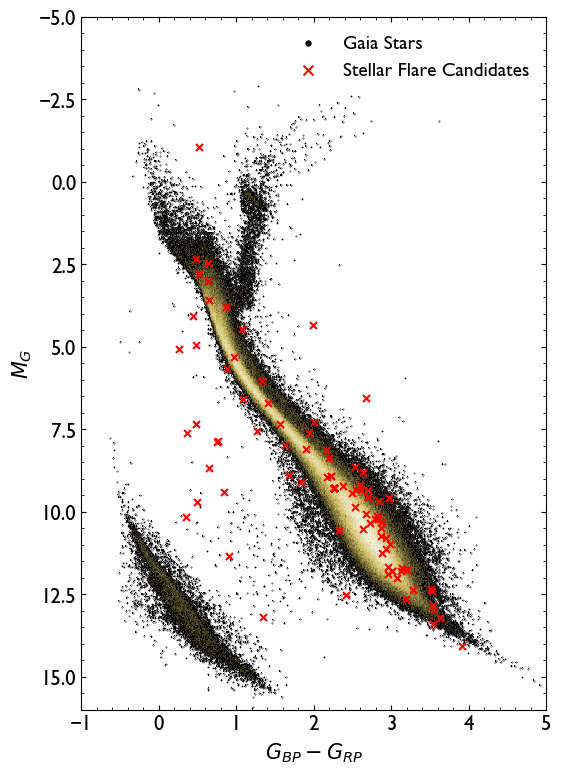

In [6]:
# df = pd.read_csv(f'{global_path}/gaiaplot7.csv')
df = pd.read_csv(f'{global_path}/gaiaplot6.csv')

bp_rp = df['bp_rp'].values
mg = df['mg'].values
d = 1000/df['parallax'].values

bp_rp_z = df_z['bp_rp']
mg_z = df_z['magnitude']
# Define Font Settings

sizefont = 15
sizefont2 = 14
plt.rcParams.update({'font.size': sizefont})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'

fig, ax = plt.subplots(figsize = (6,9))
h = ax.hist2d(bp_rp, mg, bins=500, cmin=1, norm=colors.PowerNorm(0.5), zorder=0.5,cmap = cmap_ggg) #binary_r cmap_ggg
ax.scatter(bp_rp, mg, s=0.1, color='black', zorder=0,label = 'SDSS & Gaia Stars')
ax.set_xlabel(r"$G_{BP} - G_{RP}$")
ax.set_ylabel(r"$M_G$")
# ax.set_xlim(-1, 5)
# ax.set_ylim(20, -5)
ax.set_xlim(-1, 5)
ax.set_ylim([16, -5])
ax.minorticks_on()
# Display axis ticks on all sides
ax.tick_params(which='both', direction='in', top=True, right=True)
# Turn on the border of the plot
# for spine in ax.spines.values():
#     spine.set_linewidth(1)
ax.scatter(bp_rp_z, mg_z, c='red',marker ='x',label = 'Stellar Flares',s=25)

custom_markers = [plt.scatter([], [], marker='.', color='black', edgecolor='black', s=50),
                  plt.scatter([], [], marker='x', color='red', s=50)]

legend = ax.legend(handles=custom_markers, labels=['Gaia Stars', 'Stellar Flare Candidates'], loc='upper right', frameon=False,fontsize=14)

# ax.legend(loc='upper right', frameon=False, fontsize = sizefont2)




### ON TOP POINTS

# name = []
# p = []
# m = []
# bprp = []

# print(1000/0.0051)
# M = m+5*np.log10(p)-10

# print(19.3313 - 5 * np.log10(196078.431372549/10))


# #Gaia DR3 4661828254113382784
# # Gaia DR3 4661828249815490688
# print(bprp)
# print(M)

# ax.plot(bprp, M, c='red',marker ='x',linestyle='none')
# ax.plot(bprp[-2], M[-2], c='cyan',marker ='x',linestyle='none')

# plt.show()


# #FXT LUMINOSITY
# import math

# flux = 1.916E-13  # erg/s/cm²
# parallaxes = [0.0051, 0.5435, 0.0021, 0.0744]  # mas

# # Convert parallaxes from mas to as
# parallaxes = [p / 1000 for p in parallaxes]

# solar_luminosity = 3.828E33
# luminosities = []
# for parallax in parallaxes:
#     distance = 1 / parallax
#     distance_cm = distance * 3.0857E18  # Convert parsecs to cm
#     luminosity = 4 * math.pi * (distance_cm ** 2) * flux
#     luminosities.append(luminosity)

# luminosities_sun  =[l/ solar_luminosity for l in luminosities]

# print(luminosities)
# print(luminosities_sun)

In [7]:
df_z.head()
df_z[df_z['magnitude']<0]

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,streak_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,obsid,obi,gti_obs,gti_end,region_id,theta,phi,flux_significance_b,flux_significance_w,likelihood_b,likelihood_w,conf_code,extent_code,sat_src_flag.1,streak_src_flag.1,var_code,major_axis_b,minor_axis_b,pos_angle_b,major_axis_w,minor_axis_w,pos_angle_w,cnts_aper_b,cnts_aperbkg_b,cnts_aper_w,src_cnts_aper_b,src_cnts_aper_w,src_rate_aper_b,src_rate_aper_w,flux_aper_b.1,flux_aper_lolim_b.1,flux_aper_hilim_b.1,flux_aper_w.1,flux_aper_lolim_w.1,flux_aper_hilim_w.1,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,hard_hs,hard_hs_lolim,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id,CSC2_ID,CSC2_Type,CSC2_RA,CSC2_Dec,CSC2_ErrMaj_95%,CSC2_ErrMin_95%,CSC2_ErrPA,CSC2_RawMaj_1-sigma,CSC2_RawMin_1-sigma,CSC2_RawPA,CSC2_MatchMaj_1-sigma,CSC2_MatchMin_1-sigma,CSC2_MatchPA_1-sigma,SDSSDR15_ID,SDSSDR15_Type,SDSSDR15_RA,SDSSDR15_Dec,SDSSDR15_ErrMaj_1-sigma,SDSSDR15_ErrMin_1-sigma,SDSSDR15_ErrPA_1-sigma,SDSSDR15_RawMaj_1-sigma,SDSSDR15_RawMin_1-sigma,SDSSDR15_RawPa_1-sigma,SDSSDR15_MatchMaj_1-sigma,SDSSDR15_MatchMin_1-sigma,SDSSDR15_MatchPA_1-sigma,CSC2-SDSSDR15_separation,Match_probability,Match_type,Match_grade,bp_rp,distance,magnitude
31,2CXO J121944.1+292849,184.933811,29.480312,1.035968,0.833357,5.1623,24.213098,True,True,False,False,7.421259e-14,6.643372e-14,8.150528e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7077,0,2006-03-16T14:27:20,2006-03-17T21:29:18,340,12.213404,232.37615,14.526274,NaN,571.122573,NaN,15,0,False,False,0,2.688083,2.688083,0.0,NaN,NaN,NaN,535,3784,NaN,389.516325,NaN,0.003532,NaN,4.549999e-14,4.105148e-14,4.968683e-14,NaN,NaN,NaN,0.007495,-0.076827,0.090568,-0.233604,-0.299188,-0.163023,-0.226109,-0.307933,-0.141786,0.035772,0.079318,0.082381,0.127922,0.0,NaN,110290.954077,ACIS-2,7077_340,2CXO J121944.1+292849,X,184.933815,29.480305,1.035397,0.832234,5.162,8.881,7.221,-46.193001,0.423,0.34,5.162,1237667253478948867,S,184.933629,29.480387,0.004612,0.004262,90.0,0.546691,0.481954,-77.507004,0.004612,0.34,90.0,0.653388,0.987317,E,D,0.511097,69125.289735,-1.067888


In [9]:
galaxy_df.head(60)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,streak_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,obsid,obi,gti_obs,gti_end,region_id,theta,phi,flux_significance_b,flux_significance_w,likelihood_b,likelihood_w,conf_code,extent_code,sat_src_flag.1,streak_src_flag.1,var_code,major_axis_b,minor_axis_b,pos_angle_b,major_axis_w,minor_axis_w,pos_angle_w,cnts_aper_b,cnts_aperbkg_b,cnts_aper_w,src_cnts_aper_b,src_cnts_aper_w,src_rate_aper_b,src_rate_aper_w,flux_aper_b.1,flux_aper_lolim_b.1,flux_aper_hilim_b.1,flux_aper_w.1,flux_aper_lolim_w.1,flux_aper_hilim_w.1,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,hard_hs,hard_hs_lolim,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id,CSC2_ID,CSC2_Type,CSC2_RA,CSC2_Dec,CSC2_ErrMaj_95%,CSC2_ErrMin_95%,CSC2_ErrPA,CSC2_RawMaj_1-sigma,CSC2_RawMin_1-sigma,CSC2_RawPA,CSC2_MatchMaj_1-sigma,CSC2_MatchMin_1-sigma,CSC2_MatchPA_1-sigma,SDSSDR15_ID,SDSSDR15_Type,SDSSDR15_RA,SDSSDR15_Dec,SDSSDR15_ErrMaj_1-sigma,SDSSDR15_ErrMin_1-sigma,SDSSDR15_ErrPA_1-sigma,SDSSDR15_RawMaj_1-sigma,SDSSDR15_RawMin_1-sigma,SDSSDR15_RawPa_1-sigma,SDSSDR15_MatchMaj_1-sigma,SDSSDR15_MatchMin_1-sigma,SDSSDR15_MatchPA_1-sigma,CSC2-SDSSDR15_separation,Match_probability,Match_type,Match_grade
0,2CXO J000144.7+131150,0.436516,13.197199,0.797755,0.757713,137.500927,19.424647,TRUE,False,False,False,1.191485e-13,1.100562e-13,1.277060e-13,NaN,NaN,NaN,1.180626e-13,1.117050e-13,1.244201e-13,NaN,NaN,NaN,6978,0,2006-12-06T00:38:39,2006-12-06T08:28:12,35,7.027482,60.377813,14.587905,NaN,1033.506129,NaN,7,16,False,False,0,1.474193,1.474193,0.0,NaN,NaN,NaN,276,137,NaN,277.993292,NaN,0.009999,NaN,1.191485e-13,1.100562e-13,1.277060e-13,NaN,NaN,NaN,0.057464,-0.026858,0.141786,-0.348532,-0.417864,-0.276702,-0.297314,-0.372892,-0.219238,0.089693,0.272736,0.228955,0.160337,0.0,NaN,27801.601890,ACIS-3,6978_35,2CXO J000144.7+131150,X,0.436493,13.197253,0.797965,0.758802,137.501007,3.182000,2.053000,-47.289001,0.326,0.310,137.501007,1237678860082413794,G,0.436503,13.197168,0.007416,0.006522,90.0,0.538989,0.509431,79.135002,0.007416,0.310000,90.000000,0.308003,0.997719,E,D
1,2CXO J001002.7+255746,2.511619,25.963054,0.813451,0.740161,152.291199,6.636103,TRUE,False,False,False,2.805616e-14,2.366674e-14,3.244558e-14,NaN,NaN,NaN,2.805616e-14,2.366674e-14,3.244558e-14,NaN,NaN,NaN,10401,0,2008-10-27T06:32:49,2008-10-27T12:05:48,11,3.334413,18.402868,6.636103,NaN,239.801854,NaN,0,0,False,False,16,NaN,NaN,NaN,NaN,NaN,NaN,57,16,NaN,59.768876,NaN,0.003074,NaN,2.805616e-14,2.366674e-14,3.244558e-14,NaN,NaN,NaN,0.397252,0.240475,0.535290,-0.101187,-0.285447,0.096814,0.309806,0.140537,0.471580,0.946795,0.728621,0.425068,0.357214,6.0,NaN,19446.445258,ACIS-7,10401_11,2CXO J001002.7+255746,P,2.511582,25.963015,0.812652,0.739219,152.291000,1.029000,0.459000,151.744995,0.332,0.302,152.291000,1237663308530189009,G,2.511606,25.963095,0.190719,0.121389,0.0,0.875887,0.668522,66.744003,0.190719,0.302000,0.000000,0.298280,0.995802,E,D
2,2CXO J002005.9+155640,5.024883,15.944683,4.336694,3.598735,23.242620,7.620736,TRUE,False,False,False,2.205372e-13,1.694371e-13,2.689478e-13,NaN,NaN,NaN,2.205372e-13,1.694371e-13,2.689478e-13,NaN,NaN,NaN,1595,0,2001-06-10T13:51:44,2001-06-10T19:27:21,74,15.206796,182.815323,7.620736,NaN,107.202835,NaN,7,8,False,False,30,3.966362,3.966362,0.0,NaN,NaN,NaN,424,4791,NaN,181.086201,NaN,0.009108,NaN,2.205372e-13,1.694371e-13,2.689478e-13,NaN,NaN,NaN,0.615865,0.530294,0.692692,0.723298,0.537789,0.906309,0.936914,0.873829,0.983760,1.000000,1.000000,0.998744,NaN,9.0,NaN,19882.605602,ACIS-5,1595_74,2CXO J002005.9+155640,X,5.024831,15.944618,4.337407,3.598188,23.243000,11.379001,8.974000,114.180000,1.772,1.470,23.243000,12376564

/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_3843/3226725383.py:61: UserWarning: You passed a edgecolor/edgecolors ('#A51C30') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  custom_markers = [plt.scatter([], [], marker='x', color=harvard, edgecolor=harvard, s=50),
/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_3843/3226725383.py:62: UserWarning: You passed a edgecolor/edgecolors ('#cfbd62') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([], [], marker='x', color=gold, edgecolor=gold, s=50)]


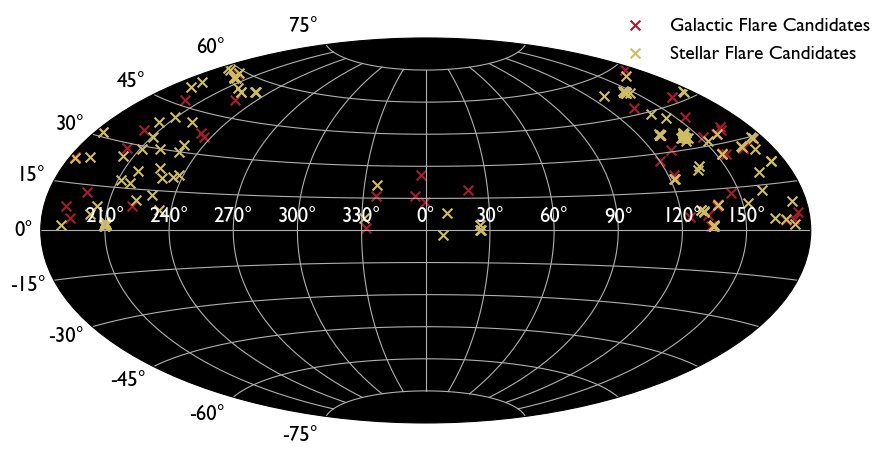

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = 'black'  # '#ebebeb'

ra_old = galaxy_df.ra.values
dec_old = galaxy_df.dec.values
ra_new= star_df.ra.values
dec_new = star_df.dec.values


# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='x', c=harvard, s=50, alpha=1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='x', c=gold, s=50, alpha=1)

custom_markers = [plt.scatter([], [], marker='x', color=harvard, edgecolor=harvard, s=50),
                  plt.scatter([], [], marker='x', color=gold, edgecolor=gold, s=50)]

legend = ax.legend(handles=custom_markers, labels=['Galactic Flare Candidates', 'Stellar Flare Candidates'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.1, 1.1))

plt.show()

/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_3843/2965939598.py:61: UserWarning: You passed a edgecolor/edgecolors ('#A51C30') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  custom_markers = [plt.scatter([], [], marker='x', color='red', edgecolor=harvard, s=50)]


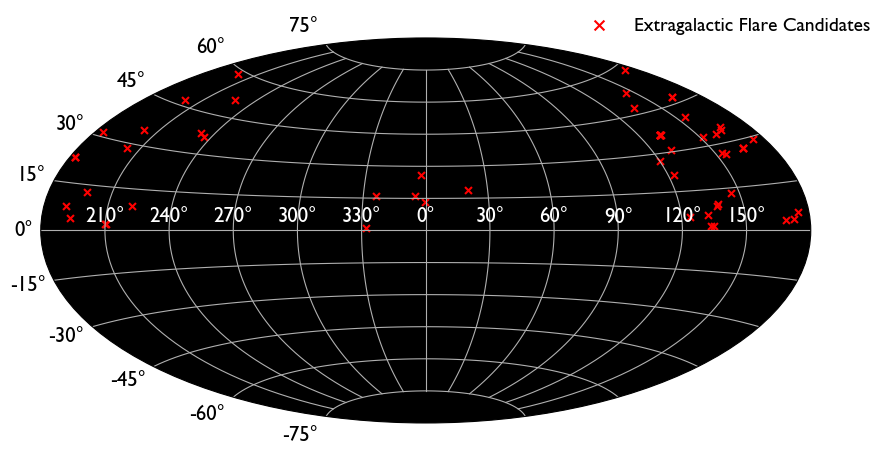

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = 'black'  # '#ebebeb'

ra_old = galaxy_df.ra.values
dec_old = galaxy_df.dec.values
ra_new= star_df.ra.values
dec_new = star_df.dec.values


# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='x', c='red', s=25, alpha=1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

# scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='x', c=gold, s=50, alpha=1)

custom_markers = [plt.scatter([], [], marker='x', color='red', edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['Extragalactic Flare Candidates'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.1, 1.1))

plt.show()

In [157]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list = galaxy_df.ra.values
dec_list = galaxy_df.dec.values

bp_rp_list = []
mg_list = []
d_list = []
index_list = []

counter_total = len(galaxy_df)
count = 0
match = 0
reject = 0

# Loop over each coordinate
for idx, (ra, dec) in enumerate(zip(ra_list, dec_list)):
    # Convert RA and Dec to astropy.coordinates.SkyCoord
    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

    # Query Gaia
    job = Gaia.launch_job_async(f"SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS', gaiadr2.gaia_source.ra, gaiadr2.gaia_source.dec), CIRCLE('ICRS', {ra}, {dec}, 0.01))=1;")
    result = job.get_results()

    # Apply filters to select stellar sources
    stars = result
    stars_df = stars.to_pandas().reset_index(drop=True)

    if len(stars) > 0:
        # Retrieve the closest matched star
        star_coords = SkyCoord(stars['ra'], stars['dec'], frame='icrs')
        distances = coord.separation(star_coords)
        closest_star_index = distances.argmin()
        closest_star = stars_df.iloc[closest_star_index]
        closest_star_coords = SkyCoord(closest_star['ra'], closest_star['dec'], frame='icrs',unit=u.deg)
        matched_stars = Gaia.cone_search_async(closest_star_coords, radius=0.01*u.deg).get_results()
        bp_rp = matched_stars['bp_rp']
        mg = matched_stars['phot_g_mean_mag'] + 5*np.log10(matched_stars['parallax']) - 10
        d = 1000/matched_stars['parallax']

        colo = bp_rp[0]
        mag = mg[0]
        di = d[0]
        print(colo,mag,di,idx)

        # Append the data
        bp_rp_list.append(colo)
        mg_list.append(mag)
        d_list.append(di)
        index_list.append(idx)

        print('MATCH')
        match = match + 1
    else:
        print('NO MATCH')
        reject = reject + 1

    count = count + 1
    print(f'{count}/{counter_total}')
    print(f'Matches: {match}')
    print(f'Rejections: {reject}')

bp_rp_arr = np.ma.array(bp_rp_list)
mg_arr = np.ma.array(mg_list)
d_arr = np.ma.array(d_list)
masked_indices = np.where(bp_rp_arr.mask | mg_arr.mask | d_arr.mask)[0]

bp_rp_list2 = np.delete(bp_rp_list, masked_indices)
mg_list2 = np.delete(mg_list, masked_indices)
d_list2 = np.delete(d_list, masked_indices)
index_list2 = np.delete(index_list,masked_indices)


matched_df = galaxy_df[galaxy_df.index.isin(index_list2)]
matched_df['bp_rp'] = bp_rp_list2
matched_df['distance'] = d_list2
matched_df['magnitude'] = mg_list2



# matched_df.to_csv(f'{global_path}/galaxyflares.csv', index=False)


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.3221931 10.615181469409034 596.1435536589565 0
MATCH
1/59
Matches: 1
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
0.8317776 -- -746.4666251100523 1
MATCH
2/59
Matches: 2
Rejections: 0


/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_999/2460779253.py:40: RuntimeWarning: invalid value encountered in log10
  mg = matched_stars['phot_g_mean_mag'] + 5*np.log10(matched_stars['parallax']) - 10


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.6171017 -- -1092.431649150294 2
MATCH
3/59
Matches: 3
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.3501148 2.2092400391843547 30250.98899574096 3
MATCH
4/59
Matches: 4
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
2.0766544 -- -693.2266202810748 4
MATCH
5/59
Matches: 5
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.09412 -- -- 5
MATCH
6/59
Matches: 6
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.6395397 -- -3445.8788727652627 6
MATCH
7/59
Matches: 7
Rejections: 0
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
1.0533638 -- -- 7
MATCH
8/59
Matches: 8
Rejections: 

/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/steven/tensorflow-test/env/lib/python3.8/site-packages/numpy/lib/function_base.py:5071: UserWarning: Warning: converting a masked element to nan.
  arr = asarray(arr)
